# Power Calculation for Validation Experiments 

The referees and editor requested we validate our findings in the context of a cohort of individuals with measurements in sorted cells. This is merely validation of our findings, so we want to optimize this experiment to be able to obtain a significant effect in this population without spending too much time and money on an overly large cohort. 

I am estimating our effect size from our previous cohort and using the R <code>pwr</code> package to do these power calculations. One observation is that while the effect size is similar in the recent and long-term HIV infected individuals, the variance is much higher in the recently infected patients. For this reason, we can increase power by focusing our validation efforts on long-term stable HIV-infected men. 

In [1]:
import os 
if os.getcwd().endswith('Review'):
    os.chdir('..')

In [2]:
import NotebookImport 
from HIV_Age_Advancement import *

importing IPython notebook from HIV_Age_Advancement

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


importing IPython notebook from Setup/MethylationAgeModels

importing IPython notebook from Setup/Read_HIV_Data

http://www.statmethods.net/stats/power.html

In [3]:
pwr = rpackages.importr('pwr')

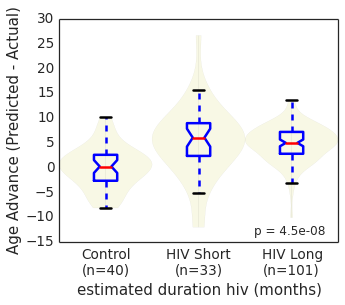

In [4]:
fig, ax = subplots(1,1, figsize=(5,4))


violin_plot_pandas(duration, pred_c - clinical.age, 
                   order=['Control','HIV Short','HIV Long'],
                   ax=ax)
ax.set_ylabel('Age Advance (Predicted - Actual)')

In [5]:
d2 = duration[duration.isin(['Control','HIV Long'])]

In [6]:
ss = (pred_c - clinical.age).ix[d2.index].dropna()
ss2 = ss.groupby(d2).apply(lambda s: s - s.mean()).std()

In [7]:
print pwr.pwr_t2n_test(n1=10, n2=10, d=3.5 / ss2, sig_level=.05,
                       alternative='greater')


     t test power calculation 

             n1 = 10
             n2 = 10
              d = 0.9045128
      sig.level = 0.05
          power = 0.6182263
    alternative = greater




In [8]:
print pwr.pwr_t2n_test(n1=15, n2=30, d=1.29, sig_level=.05,
                       alternative='greater')


     t test power calculation 

             n1 = 15
             n2 = 30
              d = 1.29
      sig.level = 0.05
          power = 0.9910854
    alternative = greater




In [9]:
print pwr.pwr_t2n_test(n1=20, n2=35, d=1.29, sig_level=.01,
                       alternative='greater')


     t test power calculation 

             n1 = 20
             n2 = 35
              d = 1.29
      sig.level = 0.01
          power = 0.9844743
    alternative = greater




In [10]:
print pwr.pwr_t2n_test(n1=20, n2=20, d=1.29, sig_level=.05,
                       alternative='greater')


     t test power calculation 

             n1 = 20
             n2 = 20
              d = 1.29
      sig.level = 0.05
          power = 0.9908719
    alternative = greater




In [11]:
print pwr.pwr_t2n_test(n1=15, n2=15, d=1.29, sig_level=.01,
                       alternative='greater')


     t test power calculation 

             n1 = 15
             n2 = 15
              d = 1.29
      sig.level = 0.01
          power = 0.8492732
    alternative = greater




In [24]:
3.7 / ss2

0.95619926648662368

In [27]:
print pwr.pwr_t2n_test(n1=23, n2=25, d=.96, sig_level=.01,
                       alternative='greater')


     t test power calculation 

             n1 = 23
             n2 = 25
              d = 0.96
      sig.level = 0.01
          power = 0.8153578
    alternative = greater




In [13]:
print pwr.pwr_t2n_test(n1=25, n2=25, d=.96, sig_level=.01,
                       alternative='greater')


     t test power calculation 

             n1 = 25
             n2 = 25
              d = 0.96
      sig.level = 0.01
          power = 0.8343066
    alternative = greater




In [14]:
print pwr.pwr_t2n_test(n1=50, n2=50, d=.96, sig_level=.01,
                       alternative='greater')


     t test power calculation 

             n1 = 50
             n2 = 50
              d = 0.96
      sig.level = 0.01
          power = 0.9919522
    alternative = greater




In [15]:
3 / ss2

0.7752967025567219

In [16]:
pc= pd.Series({n: pwr.pwr_t2n_test(n1=n, n2=n, d=.96, sig_level=.01,
                               alternative='greater')[4][0]
           for n in range(10,50)})
pc2= pd.Series({n: pwr.pwr_t2n_test(n1=n, n2=n, d=1.29, sig_level=.01,
                               alternative='greater')[4][0]
           for n in range(10,50)})
pc3= pd.Series({n: pwr.pwr_t2n_test(n1=n, n2=n, d=.78, sig_level=.01,
                               alternative='greater')[4][0]
           for n in range(10,50)})

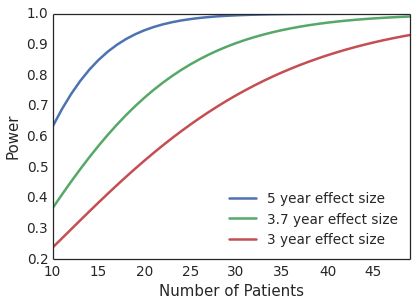

In [17]:
fig, ax = subplots()
pc2.plot(label='5 year effect size', ax=ax)
pc.plot(label='3.7 year effect size', ax=ax)
pc3.plot(label='3 year effect size', ax=ax)
ax.legend(loc='lower right')
ax.set_xlabel('Number of Patients')
ax.set_ylabel('Power')

In [18]:
3.7 / ss2

0.95619926648662368

In [19]:
print pwr.pwr_t2n_test(n1=22, n2=9, d=.96, sig_level=.01,
                       alternative='greater')


     t test power calculation 

             n1 = 22
             n2 = 9
              d = 0.96
      sig.level = 0.01
          power = 0.4946696
    alternative = greater




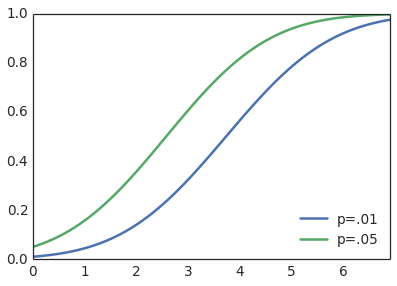

In [20]:
pc4= pd.Series({x: pwr.pwr_t2n_test(n1=22, n2=9, d=(x/ss2), sig_level=.01,
                               alternative='greater')[4][0]
                for x in arange(0,7,.1)})
pc5= pd.Series({x: pwr.pwr_t2n_test(n1=22, n2=9, d=(x/ss2), sig_level=.05,
                               alternative='greater')[4][0]
                for x in arange(0,7,.1)})
pc4.plot(label='p=.01')
pc5.plot(label='p=.05')
plt.legend(loc='lower right')

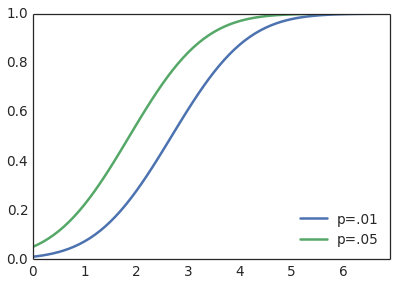

In [22]:
pc4= pd.Series({x: pwr.pwr_t2n_test(n1=23, n2=25, d=(x/ss2), sig_level=.01,
                               alternative='greater')[4][0]
                for x in arange(0,7,.1)})
pc5= pd.Series({x: pwr.pwr_t2n_test(n1=24, n2=24, d=(x/ss2), sig_level=.05,
                               alternative='greater')[4][0]
                for x in arange(0,7,.1)})
pc4.plot(label='p=.01')
pc5.plot(label='p=.05')
plt.legend(loc='lower right')